In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Funciones

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.utils.multiclass import unique_labels
def plot(y_val, y_pred, title):
    labels = unique_labels(y_train)
    column = [f'Prediccion {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_val, y_pred),
                         columns=column,index=indices)
    
    heatmap = sns.heatmap(table, annot=True, fmt='d', cmap='viridis')
    heatmap.set_title(title)
    return heatmap


In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
def resultadosModelo(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    classification_rep = classification_report(y_true, y_pred, zero_division=1)
    print("Precisión:", accuracy)
    print("Informe de Clasificación:\n")
    print(classification_rep)

In [5]:
datos=pd.read_csv("wheat.csv")

In [6]:
datos

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0


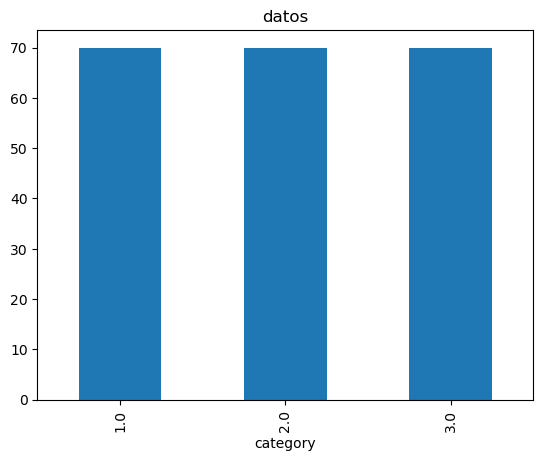

In [7]:
datos["category"].value_counts().plot(kind='bar', title='datos')
plt.savefig('distribucionT.eps', format='eps')


# ELIMINAR LINEAL DEPENDIENTES

<Axes: >

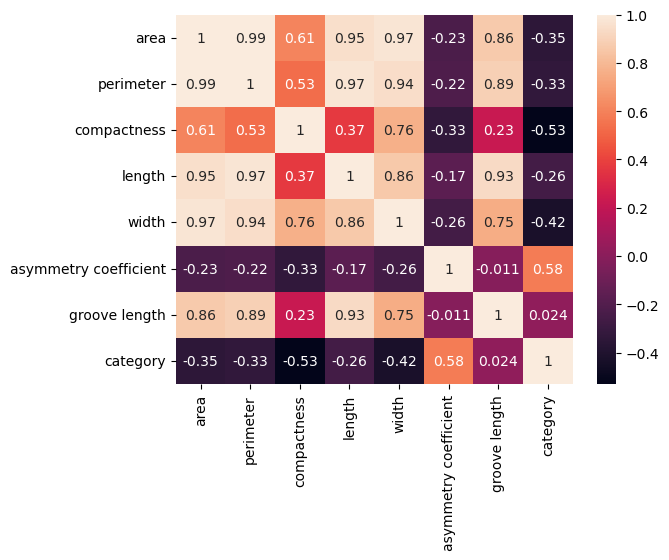

In [8]:
import seaborn as sns
sns.heatmap(datos.corr(),annot=True)
#plt.savefig('corrT.eps', format='eps')

In [9]:
eliminar=['area','length','width']

In [10]:
datos=datos.drop(eliminar,axis=1)

In [11]:
datos

,perimeter,compactness,asymmetry coefficient,groove length,category
0,14.84,0.8710,2.221,5.220,1.0
1,14.57,0.8811,1.018,4.956,1.0
2,14.09,0.9050,2.699,4.825,1.0
3,13.94,0.8955,2.259,4.805,1.0
4,14.99,0.9034,1.355,5.175,1.0
...,...,...,...,...,...
205,13.20,0.8783,3.631,4.870,3.0
206,12.88,0.8511,4.325,5.003,3.0
207,13.66,0.8883,8.315,5.056,3.0
208,13.21,0.8521,3.598,5.044,3.0


<Axes: >

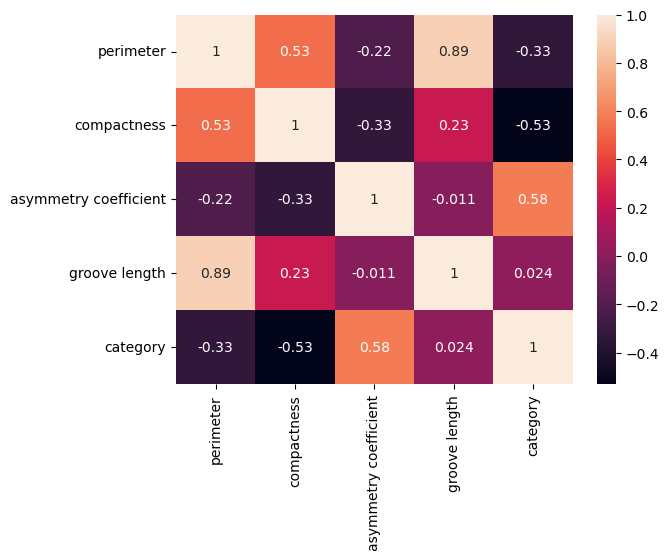

In [12]:
sns.heatmap(datos.corr(),annot=True)
#plt.savefig('corrT2.eps', format='eps')

c:\Users\andre\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


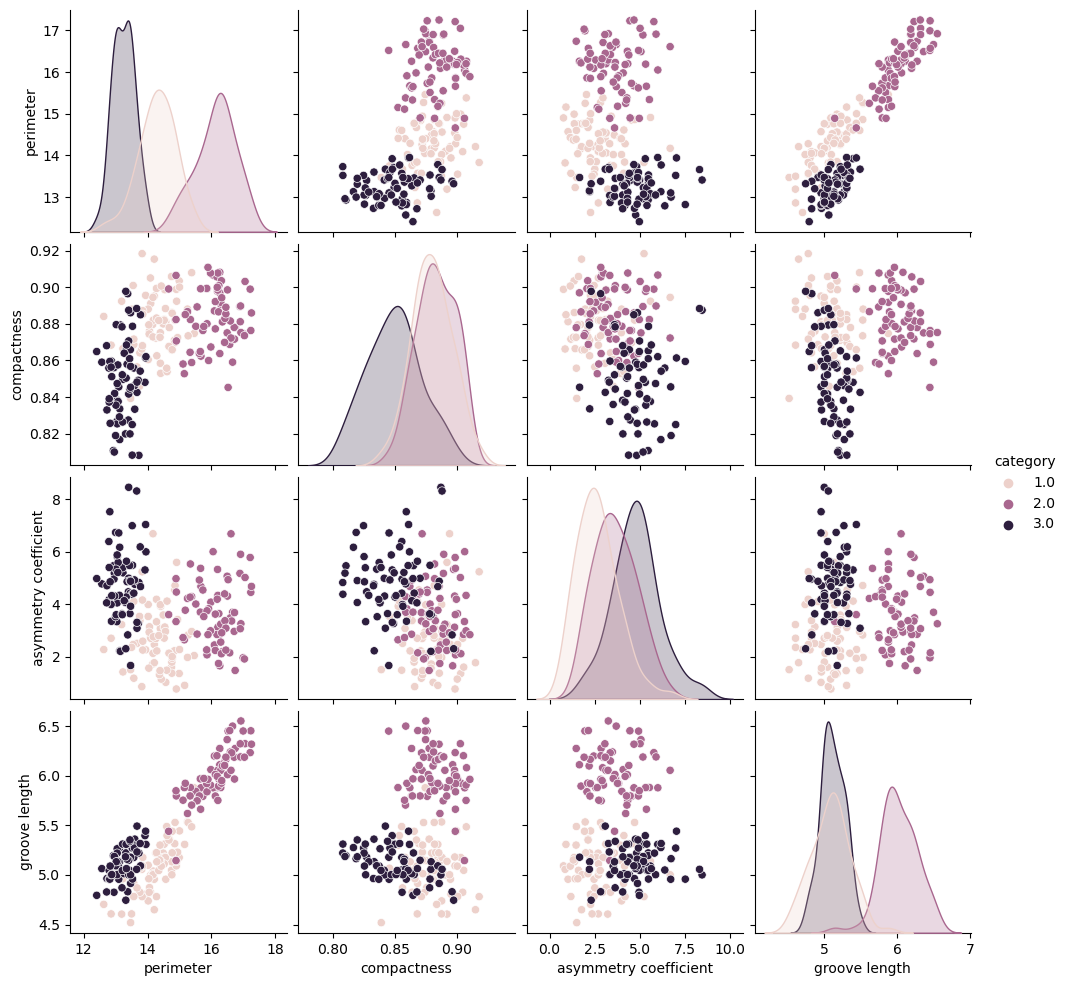

In [11]:
sns.pairplot(datos,hue='category')
plt.savefig('pairplotT.eps', format='eps')

# NORMALIZACION(PENDIENTE)

In [13]:
datos

,perimeter,compactness,asymmetry coefficient,groove length,category
0,14.84,0.8710,2.221,5.220,1.0
1,14.57,0.8811,1.018,4.956,1.0
2,14.09,0.9050,2.699,4.825,1.0
3,13.94,0.8955,2.259,4.805,1.0
4,14.99,0.9034,1.355,5.175,1.0
...,...,...,...,...,...
205,13.20,0.8783,3.631,4.870,3.0
206,12.88,0.8511,4.325,5.003,3.0
207,13.66,0.8883,8.315,5.056,3.0
208,13.21,0.8521,3.598,5.044,3.0


In [14]:
from sklearn.preprocessing import normalize

normalized_data = normalize(datos, axis=0)
datosN = pd.DataFrame(normalized_data, columns=datos.columns)


In [15]:

X = datos.drop("category", axis = 1)
Y = datos['category']

In [16]:
mean = X.mean(axis=0)
std = X.std(axis=0)
dataN = (X - mean) / std
X=dataN

In [19]:
from sklearn.utils import shuffle

In [24]:
# Supongamos que 'X' es tu conjunto de características y 'y' es tu conjunto de etiquetas

# Agrega ruido gaussiano a las características
X_perturbed = X + np.random.normal(0, 0.1, X.shape)

# Combina los datos originales con los perturbados
X_extended = np.vstack((X, X_perturbed))
y_extended = np.concatenate((Y, Y))

# Mezcla los datos para evitar patrones
X_extended, y_extended = shuffle(X_extended, y_extended)



### DIVISION DATOS 80/20

In [29]:

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_extended,y_extended, test_size=0.3, random_state=42)

# RANDOM FOREST

In [30]:
from sklearn.ensemble import RandomForestClassifier

r_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
r_classifier.fit(X_train, y_train)
y_pred = r_classifier.predict(X_val)

In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_prueba = best_model.predict(X_val)
y_test_prueba = best_model.predict(X_train)

best_params = best_model.get_params
best_params

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
250 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\andre\anaconda3\Lib\site-packag

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=8, n_estimators=400, random_state=42)>

In [34]:
best_params = grid_search.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 400}

### MATRIZ CONFUSION 1

<Axes: title={'center': 'Validacion'}>

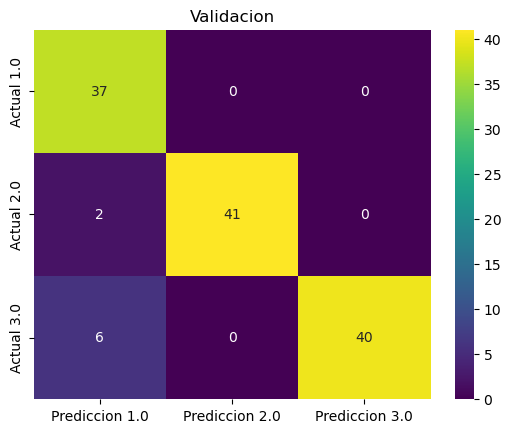

In [36]:
plot(y_val,y_pred_prueba,'Validacion')
# plt.savefig('mejorForestV.eps', format='eps')


<Axes: title={'center': 'Entrenamiento'}>

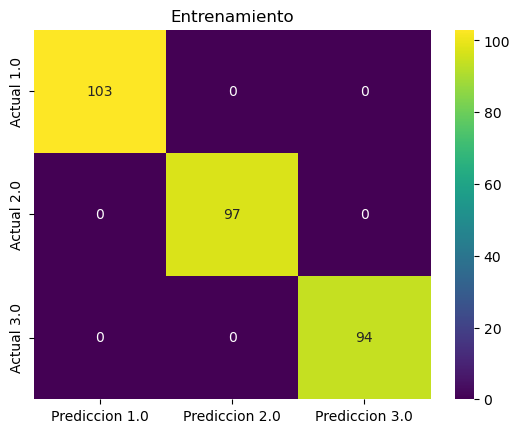

In [37]:
plot(y_train,y_test_prueba,'Entrenamiento')
#plt.savefig('mejorForestE.eps', format='eps')

In [38]:
resultadosModelo(y_val, y_pred)

Precisión: 0.9365079365079365
Informe de Clasificación:

              precision    recall  f1-score   support

         1.0       0.82      1.00      0.90        37
         2.0       1.00      0.95      0.98        43
         3.0       1.00      0.87      0.93        46

    accuracy                           0.94       126
   macro avg       0.94      0.94      0.94       126
weighted avg       0.95      0.94      0.94       126



In [39]:
resultadosModelo(y_train,y_test_prueba)

Precisión: 1.0
Informe de Clasificación:

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       103
         2.0       1.00      1.00      1.00        97
         3.0       1.00      1.00      1.00        94

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



# K-NN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1,leaf_size=80)
neigh.fit(X_train, y_train)
y_pred2 = neigh.predict(X_val)


In [41]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size':[10,20,40,60,80,100,120]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_prueba2 = best_model.predict(X_val)
y_train_prueba2 = best_model.predict(X_train)

best_params = best_model.get_params


In [42]:
best_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(leaf_size=10, p=1, weights='distance')>

<Axes: title={'center': 'Validacion'}>

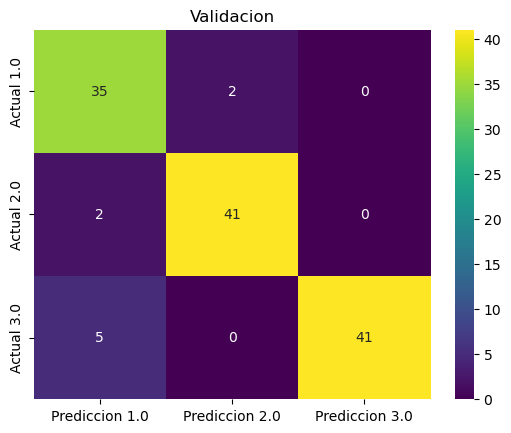

In [43]:
plot(y_val,y_pred_prueba2,"Validacion")
#plt.savefig('mejorkmeansV.eps', format='eps')

<Axes: title={'center': 'Entrenamiento'}>

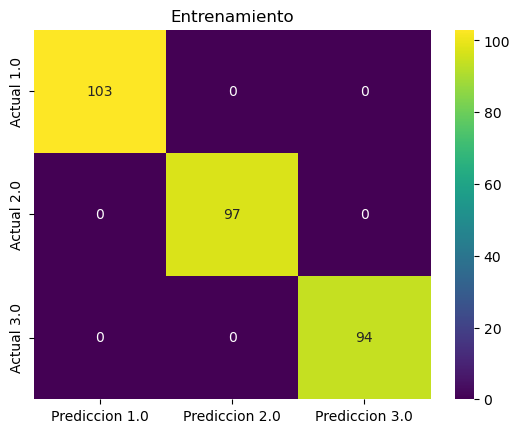

In [44]:
plot(y_train,y_train_prueba2,"Entrenamiento")
#plt.savefig('mejorkmeansE.eps', format='eps')

In [46]:
resultadosModelo(y_val, y_pred_prueba2)

Precisión: 0.9285714285714286
Informe de Clasificación:

              precision    recall  f1-score   support

         1.0       0.83      0.95      0.89        37
         2.0       0.95      0.95      0.95        43
         3.0       1.00      0.89      0.94        46

    accuracy                           0.93       126
   macro avg       0.93      0.93      0.93       126
weighted avg       0.94      0.93      0.93       126



In [47]:
resultadosModelo(y_train, y_train_prueba2)

Precisión: 1.0
Informe de Clasificación:

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       103
         2.0       1.00      1.00      1.00        97
         3.0       1.00      1.00      1.00        94

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



# Arboles de decision

In [48]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred3 = classifier.predict(X_val)

In [51]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Create the grid search object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_prueba3 = best_model.predict(X_val)
y_train_prueba3 = best_model.predict(X_train)

best_params = best_model.get_params


c:\Users\andre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\andre\anaconda3\Lib\site-pac

In [53]:
best_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(criterion='log_loss', max_depth=30, max_features='sqrt',
                       min_samples_split=5)>

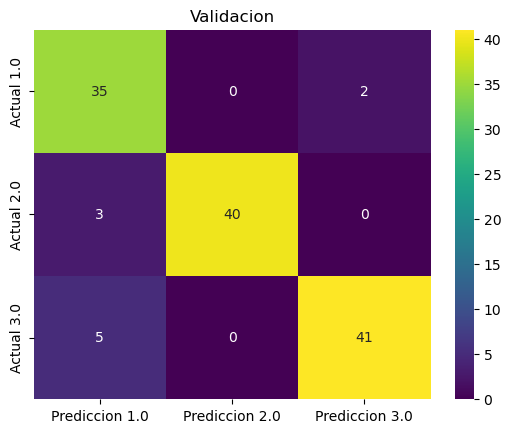

In [54]:
plot(y_val,y_pred_prueba3,"Validacion")
#plt.savefig('mejorArbolV.eps', format='eps')

<Axes: title={'center': 'Entrenamiento'}>

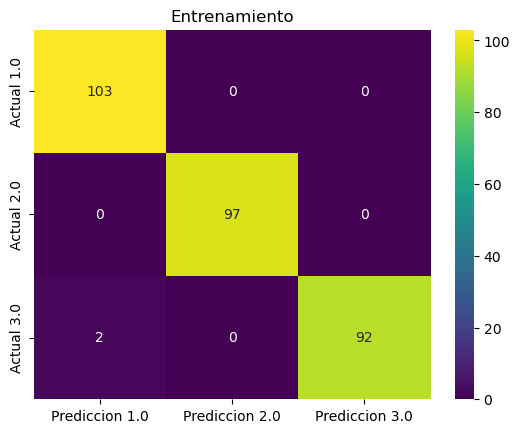

In [55]:
plot(y_train,y_train_prueba3,"Entrenamiento")
#plt.savefig('mejorArbolE.eps', format='eps')

In [56]:
resultadosModelo(y_val, y_pred_prueba3)

Precisión: 0.9206349206349206
Informe de Clasificación:

              precision    recall  f1-score   support

         1.0       0.81      0.95      0.88        37
         2.0       1.00      0.93      0.96        43
         3.0       0.95      0.89      0.92        46

    accuracy                           0.92       126
   macro avg       0.92      0.92      0.92       126
weighted avg       0.93      0.92      0.92       126



In [57]:
resultadosModelo(y_train, y_train_prueba3)

Precisión: 0.9931972789115646
Informe de Clasificación:

              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99       103
         2.0       1.00      1.00      1.00        97
         3.0       1.00      0.98      0.99        94

    accuracy                           0.99       294
   macro avg       0.99      0.99      0.99       294
weighted avg       0.99      0.99      0.99       294



Precisión para calidad 1: 0.7826
Precisión para calidad 2: 1.0000
Precisión para calidad 3: 0.9000


# SVM

In [58]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', C=0.01)
svm_classifier.fit(X_train, y_train)
y_pred4 = svm_classifier.predict(X_val)

In [61]:
param_grid = {
    'C': [0.001, 0.01,0.1, 1, 10],  # Parámetro de regularización
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Tipo de kernel
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [0.001,0.01,0.1,1,10]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=SVC(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_prueba4 = best_model.predict(X_val)
y_train_prueba4 = best_model.predict(X_train)

best_params = best_model.get_params


c:\Users\andre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1200 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\andre\anaconda3\Lib\site-pack

In [62]:
best_params=grid_search.best_params_

best_params

{'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}

<Axes: title={'center': 'Validacion'}>

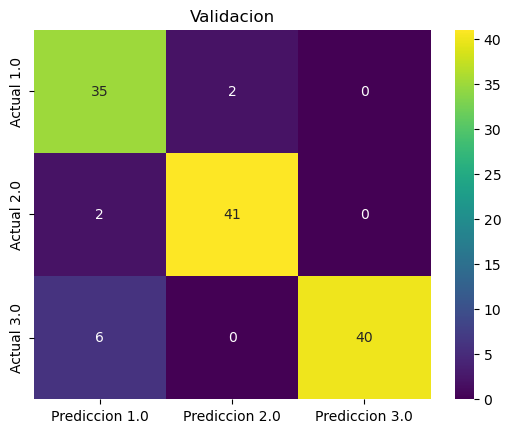

In [63]:
plot(y_val,y_pred_prueba4,"Validacion")
#plt.savefig('mejorSVMV.eps', format='eps')

<Axes: title={'center': 'Entrenamiento'}>

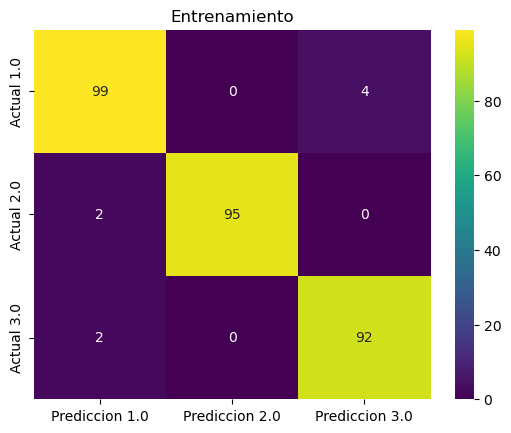

In [64]:
plot(y_train,y_train_prueba4,"Entrenamiento")
#plt.savefig('mejorSVME.eps', format='eps')

In [65]:
resultadosModelo(y_val, y_pred_prueba4)

Precisión: 0.9206349206349206
Informe de Clasificación:

              precision    recall  f1-score   support

         1.0       0.81      0.95      0.88        37
         2.0       0.95      0.95      0.95        43
         3.0       1.00      0.87      0.93        46

    accuracy                           0.92       126
   macro avg       0.92      0.92      0.92       126
weighted avg       0.93      0.92      0.92       126



In [66]:
resultadosModelo(y_train, y_train_prueba4)

Precisión: 0.9727891156462585
Informe de Clasificación:

              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96       103
         2.0       1.00      0.98      0.99        97
         3.0       0.96      0.98      0.97        94

    accuracy                           0.97       294
   macro avg       0.97      0.97      0.97       294
weighted avg       0.97      0.97      0.97       294



Precisión para calidad 1: 0.8500
Precisión para calidad 2: 1.0000
Precisión para calidad 3: 0.8696


# MLP

In [67]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(160,320,160),activation= 'tanh', max_iter=10000,alpha= 0.0001,learning_rate='constant',
 solver= 'lbfgs')
mlp.fit(X_train, y_train)


MLPClassifier(activation='tanh', hidden_layer_sizes=(160, 320, 160),
              max_iter=10000, solver='lbfgs')

In [96]:
y_pred5 = mlp.predict(X_val)
y_train5 = mlp.predict(X_train)

In [68]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(90,60,90), (60,30,60),(60,60)],
    'learning_rate':['constant', 'invscaling', 'adaptive'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Create the grid search object
grid_search = GridSearchCV(estimator=MLPClassifier(max_iter=10000),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred = best_model.predict(X_val)
y_train5 = best_model.predict(X_train)
best_params = grid_search.best_params_
# Fit the grid search to the training data


In [70]:
best_params

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': (60, 30, 60),
 'learning_rate': 'constant',
 'solver': 'adam'}

<Axes: title={'center': 'Validacion'}>

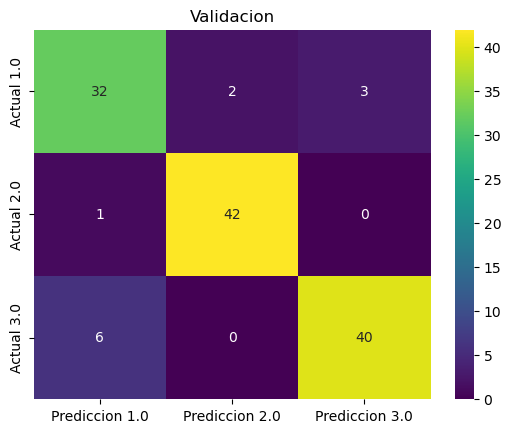

In [72]:
plot(y_val,y_pred,'Validacion')
#plt.savefig('mejorMLPV.eps', format='eps')

<Axes: title={'center': 'Entrenamiento'}>

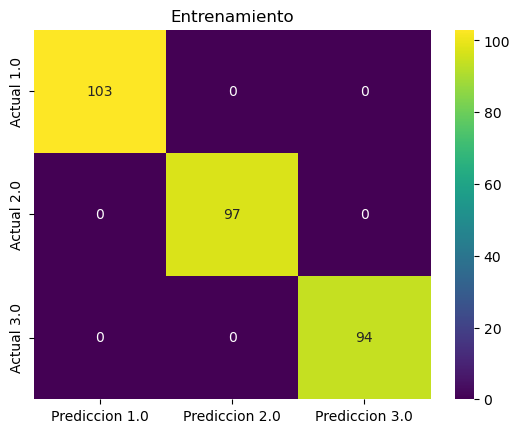

In [73]:
plot(y_train,y_train5,'Entrenamiento')
#plt.savefig('mejorMLPE.eps', format='eps')

In [76]:
resultadosModelo(y_val, y_pred)

Precisión: 0.9047619047619048
Informe de Clasificación:

              precision    recall  f1-score   support

         1.0       0.82      0.86      0.84        37
         2.0       0.95      0.98      0.97        43
         3.0       0.93      0.87      0.90        46

    accuracy                           0.90       126
   macro avg       0.90      0.90      0.90       126
weighted avg       0.91      0.90      0.90       126



In [77]:
resultadosModelo(y_train, y_train5)

Precisión: 1.0
Informe de Clasificación:

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       103
         2.0       1.00      1.00      1.00        97
         3.0       1.00      1.00      1.00        94

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



Precisión para calidad 1: 0.7826
Precisión para calidad 2: 1.0000
Precisión para calidad 3: 0.9048


# TENSOR

In [26]:
from tensorflow import keras
y_train_array = y_train.values
y_val_array = y_val.values
# Ensure the values are integers, as to_categorical expects integers
y_train_array = y_train_array.astype(int)
y_val_array = y_val_array.astype(int)
# Subtract 1 from y_train_array because to_categorical assumes that the classes start from 0
y_train_array = y_train_array - 1
y_val_array = y_val_array - 1
# Convert to one-hot encoding
y_train2 = keras.utils.to_categorical(y_train_array, num_classes=3)
y_val2 = keras.utils.to_categorical(y_val_array, num_classes=3)

In [28]:
X_train

,perimeter,compactness,asymmetry coefficient,groove length
128,1.891878,0.105861,-1.190644,1.580792
79,0.758611,0.770287,-0.560139,0.687573
205,-1.040834,0.308997,-0.046025,-1.094797
208,-1.033176,-0.799790,-0.067973,-0.740765
31,0.291521,0.059309,-0.191679,-0.366386
...,...,...,...,...
106,1.233358,1.464337,-0.570115,1.611312
14,-0.389971,0.143949,-0.510922,-1.186357
92,1.325244,0.829535,-0.308070,1.312216
179,-0.834089,-1.087567,-1.356251,-0.468119


In [22]:


model = tf.keras.models.Sequential([
  
  keras.layers.Dense(160, activation='tanh', input_shape=(4,), kernel_regularizer=keras.regularizers.l2(0.001)),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(320, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001)),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(160, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001)),
  keras.layers.Dropout(0.5),
  
  keras.layers.Dense(3, activation='softmax')
])


model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train2, batch_size=32, epochs=1000, verbose=3, 
                    shuffle=True, validation_data=(X_val, y_val2))


print(history.history.keys())

Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000
Epoch 62/1000
Epoch 63/1000
Epoch 64/1000
Epoch 65/1000
Epoch 66/1000
Epoch 67/1000
Epoch 68/1000
Epoch 69/1000
Epoch 70/1000
Epoch 71/1000
Epoch 72/1000
E

2/2 [==============================] - 0s 2ms/step


5/5 [==============================] - 0s 1ms/step


<Axes: title={'center': 'Validacion'}>

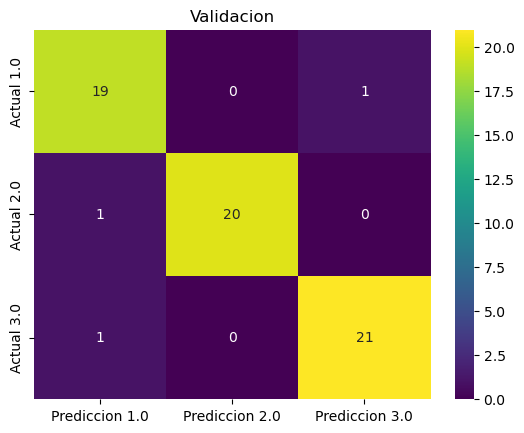

In [29]:

q = model.predict(X_val)
q2 = model.predict(X_train)
q=np.argmax(q, axis = 1)
q2=np.argmax(q2, axis = 1)
plot(y_val_array,q,"Validacion")
# plt.savefig('mejorTensorV.eps', format='eps')

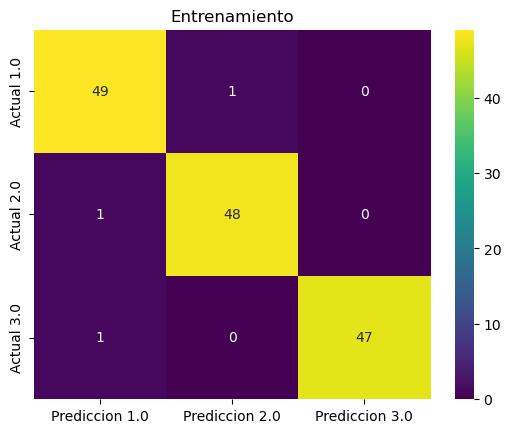

In [108]:
plot(y_train_array,q2,"Entrenamiento")
plt.savefig('mejorTensorE.eps', format='eps')

In [109]:
resultadosModelo(y_val_array,q)

Precisión: 0.9365079365079365
Informe de Clasificación:

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       1.00      0.95      0.98        21
           2       0.95      0.91      0.93        22

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63



In [110]:
resultadosModelo(y_train_array,q2)

Precisión: 0.9795918367346939
Informe de Clasificación:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        50
           1       0.98      0.98      0.98        49
           2       1.00      0.98      0.99        48

    accuracy                           0.98       147
   macro avg       0.98      0.98      0.98       147
weighted avg       0.98      0.98      0.98       147

